In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
from pydataset import data
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from pydataset import data
from scipy import stats

In [2]:
# Aquire Telco Data combining all tables
# Used SQL statment to convert object type columns to intiger
import get_function_telco as gft
df = gft.get_telco()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
customer_id               7043 non-null object
gender                    7043 non-null object
is_male                   7043 non-null int64
senior_citizen            7043 non-null int64
partner                   7043 non-null int64
dependents                7043 non-null int64
family                    7043 non-null int64
partner_deps_id           7043 non-null int64
partner_deps              7043 non-null object
tenure                    7043 non-null int64
phone_service             7043 non-null int64
multiple_lines            7043 non-null int64
phone_service_id          7043 non-null int64
phone_service_type        7043 non-null object
internet_service          7043 non-null int64
has_dsl                   7043 non-null int64
has_fiber                 7043 non-null int64
online_security           7043 non-null int64
online_backup             7043 non-null int64
online_security

In [4]:
df.describe()

,is_male,senior_citizen,partner,dependents,family,partner_deps_id,tenure,phone_service,multiple_lines,phone_service_id,...,streaming_services,contract_type_id,on_contract,contract_duration,paperless_billing,payment_type_id,auto_pay,monthly_charges,total_charges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,0.534289,1.265654,32.371149,0.903166,0.421837,1.325004,...,0.496805,1.690473,0.550192,8.835865,0.592219,2.315633,0.435326,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,0.498858,1.274126,24.559481,0.295752,0.493888,0.642730,...,0.500025,0.833755,0.497510,9.551444,0.491457,1.148907,0.495835,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,29.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,55.000000,1.000000,1.000000,2.000000,...,1.000000,2.000000,1.000000,12.000000,1.000000,3.000000,1.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,72.000000,1.000000,1.000000,2.000000,...,1.000000,3.000000,1.000000,24.000000,1.000000,4.000000,1.000000,118.750000,8684.800000,1.000000


In [5]:
#dropping columns with redundant values
df = df.drop(columns=["contract_type","payment_type",'phone_service_type','gender','payment_type_id'])

In [6]:
#split data into test and train
train, test = train_test_split(df, train_size = .8, random_state = 999)

In [7]:
# assign x and y train.
# dropping 'object' type columns from X_train
X_train = train.drop(columns=['churn','customer_id','partner_deps'])
y_train = train.churn

In [8]:
# Running initial decition tree with multiple max_depths with 
# criterion entropy
x=1
while x < 20:
    
    clf=DecisionTreeClassifier(criterion='entropy',max_depth=x,random_state=123)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_train)
    y_pred_proba=clf.predict_proba(X_train)
    y_pred_proba

    print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))
    
    x += 1

Accuracy of Decision Tree classifier on training set: 0.73
Accuracy of Decision Tree classifier on training set: 0.76
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.80
Accuracy of Decision Tree classifier on training set: 0.81
Accuracy of Decision Tree classifier on training set: 0.83
Accuracy of Decision Tree classifier on training set: 0.84
Accuracy of Decision Tree classifier on training set: 0.86
Accuracy of Decision Tree classifier on training set: 0.87
Accuracy of Decision Tree classifier on training set: 0.89
Accuracy of Decision Tree classifier on training set: 0.91
Accuracy of Decision Tree classifier on training set: 0.92
Accuracy of Decision Tree classifier on training set: 0.94
Accuracy of Decision Tree classifier on training set: 0.95
Accuracy of Decision Tree classifier on training set: 0.

In [9]:
# Running initial decition tree with multiple max_depths with 
# criterion gini
x=1
while x < 20:
    
    clf=DecisionTreeClassifier(criterion='gini',max_depth=x,random_state=123)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_train)
    y_pred_proba=clf.predict_proba(X_train)
    y_pred_proba

    print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))
    
    x += 1

Accuracy of Decision Tree classifier on training set: 0.73
Accuracy of Decision Tree classifier on training set: 0.76
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.80
Accuracy of Decision Tree classifier on training set: 0.80
Accuracy of Decision Tree classifier on training set: 0.82
Accuracy of Decision Tree classifier on training set: 0.83
Accuracy of Decision Tree classifier on training set: 0.84
Accuracy of Decision Tree classifier on training set: 0.86
Accuracy of Decision Tree classifier on training set: 0.89
Accuracy of Decision Tree classifier on training set: 0.91
Accuracy of Decision Tree classifier on training set: 0.93
Accuracy of Decision Tree classifier on training set: 0.94
Accuracy of Decision Tree classifier on training set: 0.95
Accuracy of Decision Tree classifier on training set: 0.97
Accuracy of Decision Tree classifier on training set: 0.

In [10]:
# Each initial decition tree increases in accuracy evenly 
# as max depth is increased
# Both range from low 70's to high 90's
# I am going to focus on trying to remove supurfluis features without 
# losing too much predictive accuracy

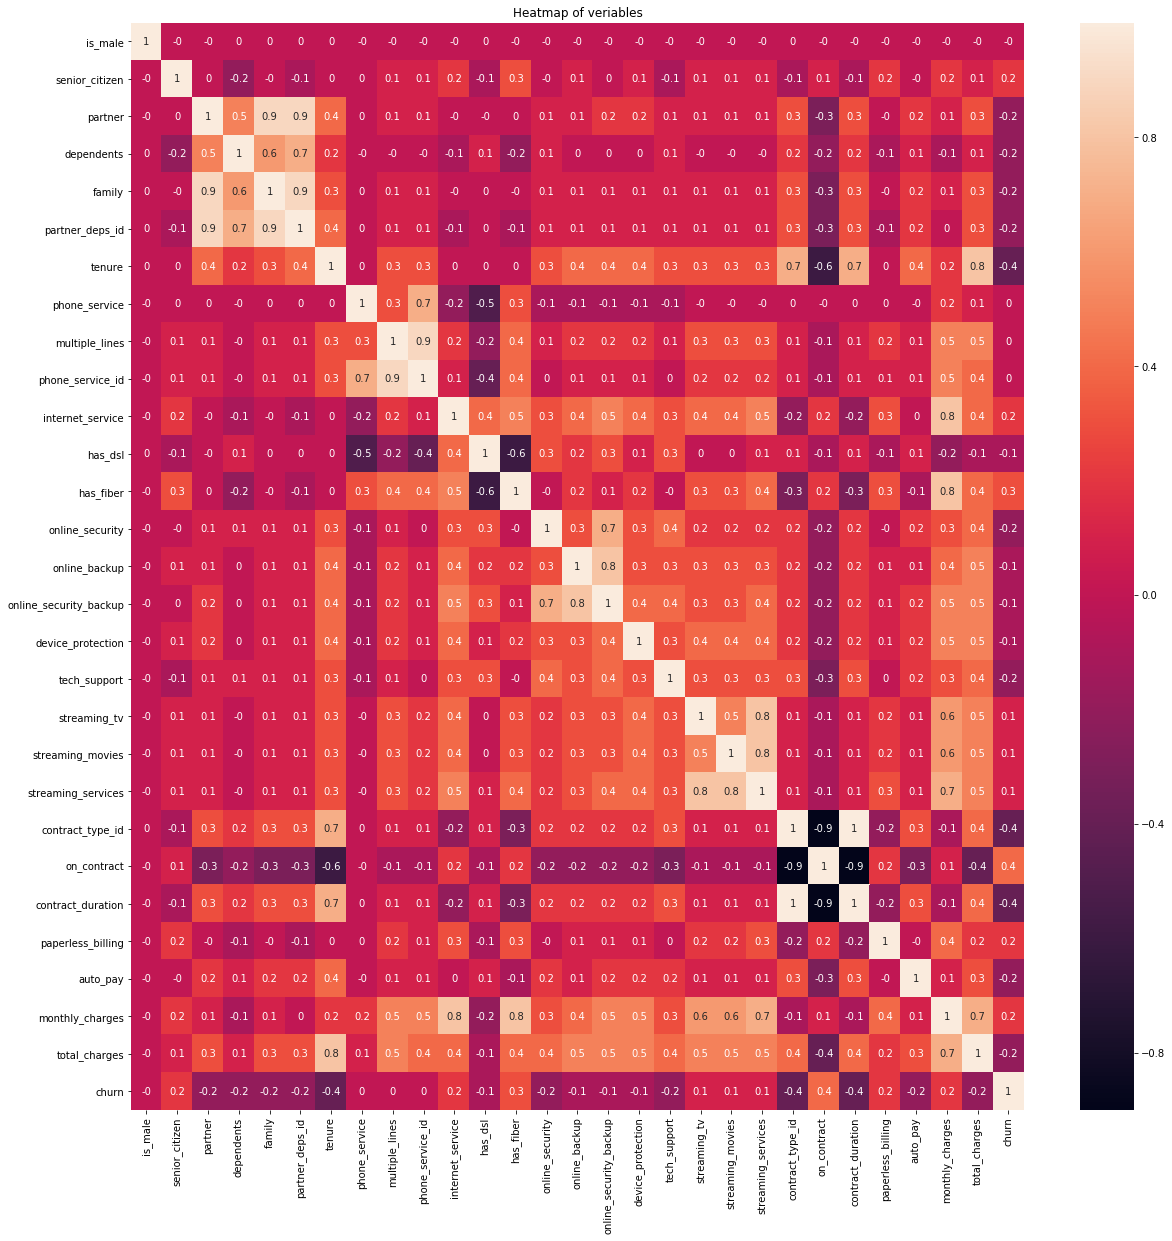

In [11]:
# Displaying heat map of features and churn
plt.figure(figsize=(20, 20))
plt.title("Heatmap of veriables")
sns.heatmap(round(df.corr(),1),annot=True)
plt.show()

In [12]:
# Nerrowing features to those have at least a .3 correlation with 
# churn.
# Remaining veriables are: tenure, has_fiber, contract_type_id, 
# on_contract, contract_duration,
# removing contract_type_id, on_contract, and contract_duration all 
# convay similer information removing all except contract duration
# Remaining features are tenure, has_fiber, and contract_duration

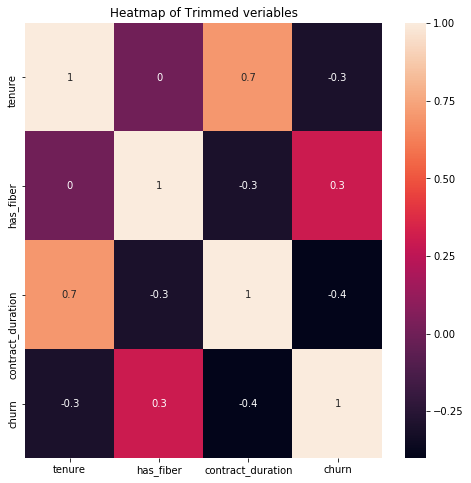

In [13]:
df_3 = train[['tenure', 'has_fiber', 'contract_duration','churn']]
plt.figure(figsize=(8, 8))
plt.title("Heatmap of Trimmed veriables")
sns.heatmap(round(df_3.corr(),1),annot=True)
plt.show()

In [14]:
# Running new tree chart to test new features
# assigning new X_train and y_train

X_train = train[['tenure','has_fiber','contract_duration']]
y_train = train.churn

In [15]:
# Running new decition tree at multiple max_depths 
# with 'entropy' criterion
x=1
while x < 20:
    
    clf=DecisionTreeClassifier(criterion='entropy',max_depth=x,random_state=123)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_train)
    y_pred_proba=clf.predict_proba(X_train)
   

    print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))
    
    x += 1

Accuracy of Decision Tree classifier on training set: 0.73
Accuracy of Decision Tree classifier on training set: 0.76
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.

In [16]:
# Running new decision tree at multiple max_depths 
# with 'gini' criterion
x=1
while x < 20:
    
    clf=DecisionTreeClassifier(criterion='gini',max_depth=x,random_state=123)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_train)
    y_pred_proba=clf.predict_proba(X_train)
    y_pred_proba

    print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))
    
    x += 1

Accuracy of Decision Tree classifier on training set: 0.73
Accuracy of Decision Tree classifier on training set: 0.76
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on training set: 0.

In [17]:
# the decition tree with the selected veriables performs as well as 
# the baseline with many veriables at max_depth of 3 however they 
# do not predict churn above .79.

In [18]:
# Running secondary model as K Nearest Neighbor
# assigning new X_train and y_train

X_train = train[['tenure','has_fiber','contract_duration']]
y_train = train.churn

In [19]:
# Running secondary model as K Nearest Neighbor for multiple K's


k=1

while k < 20:

    knn=KNeighborsClassifier(n_neighbors=5,weights='uniform')
    knn.fit(X_train,y_train)

    y_pred=knn.predict(X_train)
    y_pred_proba=knn.predict_proba(X_train)
    
    print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train,y_train)))

    k += 1

Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.78


In [20]:
# K Nearest Neighbor model preforms slightly worse than decition tree 
# getting a predictive value of .78

# I will proceed using the Decition Tree Model using a max_depth of 3
# and a the 'entropy' criterion

In [21]:
# Running decition tree with test data

In [22]:
# assigning test train vaiables
X_train = train[['tenure','has_fiber','contract_duration']]
y_train = train.churn

X_test = test[['tenure','has_fiber','contract_duration']]
y_test = test.churn

In [23]:
# running test decition tree

clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=123)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_test,y_test)))

Accuracy of Decision Tree classifier on training set: 0.80


In [24]:
# Decision tree model performed slightly better on the test data
# it had an accuracy of .80

In [25]:
# Write csv
# assigning test train vaiables
X_train = train[['tenure','has_fiber','contract_duration']]
y_train = train.churn

X_test = test[['tenure','has_fiber','contract_duration']]
y_test = test.churn

***1) Is there a tenure in which a customer is more likely to churn by contract type***

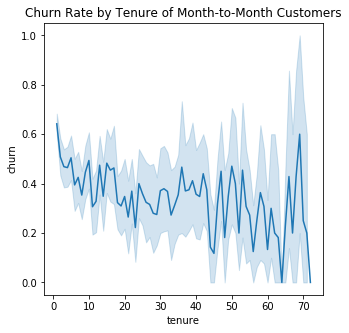

In [27]:
plt.figure(figsize=(5, 5))
plt.title("Churn Rate by Tenure of Month-to-Month Customers")
sns.lineplot(train[train.contract_duration==1].tenure,train.churn)
plt.show()

**Month-to-Month churn rate peaks at 0 and just before 70**

**May suggest overall decrease in churn over time**

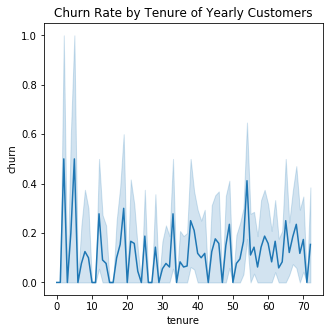

In [28]:
plt.figure(figsize=(5, 5))
plt.title("Churn Rate by Tenure of Yearly Customers")
sns.lineplot(train[train.contract_duration==12].tenure,train.churn)
plt.show()

**Churn rate of yearly customers peaks and falls consistantly.**

**Peaks in churn are not explainable by contract experation**

**spiken in churn near tenure 55**

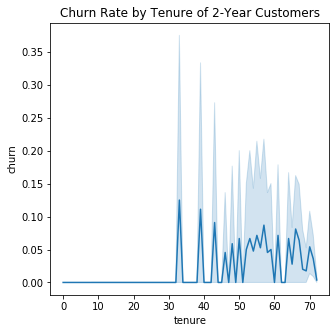

In [29]:
plt.figure(figsize=(5, 5))
plt.title("Churn Rate by Tenure of 2-Year Customers")
sns.lineplot(train[train.contract_duration==24].tenure,train.churn)
plt.show()

**Churn rate of yearly customers peaks and falls consistantly.**

**Peaks in churn are not explainable by contract experation**

**2) Are there features that indicate a higher propensity to churn?**

***Yes, Has fiberoptic internet service***

**3) Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service?**

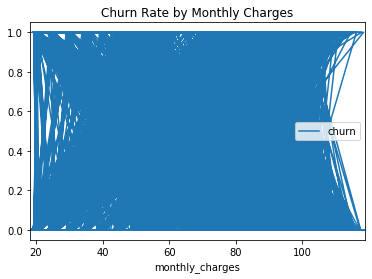

In [30]:

train.plot.line('monthly_charges','churn')
plt.title("Churn Rate by Monthly Charges")
plt.show()

**4) If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?**

In [31]:
#Month-to-month average churn if tenure is over 12
churn = train[(train.contract_duration==1) & (train.tenure>12) & (train.churn==1)].churn.sum()
total = train.churn.count()
churn_rate = churn/total

churn_rate

0.09069932552360667

In [32]:
#Yearly average churn if tenure is over 12
churn = train[(train.contract_duration==12) & (train.tenure>12) & (train.churn==1)].churn.sum()
total = train.churn.count()
churn_rate = churn/total

churn_rate

0.022364217252396165

**Month-to-month average churn after month 12 is about .09**

**Yearly average churn is about .02**

**only a .07 difference**

**5) Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned?**

In [33]:
# T-test to determine if churning dsl users have differing monthly cost
ver1 = train[(train.has_dsl==1) & (train.churn==1)].monthly_charges
ver2 = train[(train.has_dsl==1) & (train.churn==0)].monthly_charges
stats.ttest_ind(ver1, ver2)

Ttest_indResult(statistic=-12.181439063454956, pvalue=6.0862064168600466e-33)

**Monthly charges differ significantly for dsl users**

In [34]:
# T-test to determine if churning Fiber-optics users have 
ver1 = train[(train.has_fiber==1) & (train.churn==1)].monthly_charges
ver2 = train[(train.has_fiber==1) & (train.churn==0)].monthly_charges
stats.ttest_ind(ver1, ver2)

Ttest_indResult(statistic=-11.660646039206169, pvalue=1.2786208677452417e-30)

**Monthly charges differ significantly for Fiber-optics users**

In [35]:
# T-test to determine if churning online_security_backup users have differing monthly cost
ver1 = train[(train.online_security_backup==1) & (train.churn==1)].monthly_charges
ver2 = train[(train.online_security_backup==1) & (train.churn==0)].monthly_charges
stats.ttest_ind(ver1, ver2)

Ttest_indResult(statistic=4.4035149534856, pvalue=1.1074655837468246e-05)

**Monthly charges differ significantly for online_security_backup users**

In [36]:
# T-test to determine if churning device_protection users have differing monthly cost
ver1 = train[(train.device_protection==1) & (train.churn==1)].monthly_charges
ver2 = train[(train.device_protection==1) & (train.churn==0)].monthly_charges
stats.ttest_ind(ver1, ver2)

Ttest_indResult(statistic=3.296660294778826, pvalue=0.0009962498056300096)

**Monthly charges differ significantly for online_security_backup users**

**Given the Small pvalues generated in the T-tests above I will conclude that of the services I tested their is a statistically significant differince between the monthly charges of customers who churned and customers who did not churn.**

**6) How much of monthly_charges can be explained by internet_service_type?**

**Ho: There is no relationship between the customer having dsl and the customer's monthly charges.**

**Ha: There is a relationship between the customer having dsl and the customer's monthly charges.**

In [37]:
# Run correlation test
stats.pearsonr(train.has_dsl, train.monthly_charges)

(-0.15729814125408786, 1.5366219932492784e-32)

**Reject the Ho**

**15% of monthly charges can be explained by the customer having dsl.**

**Ho: There is no relationship between the customer having fiberoptic cable and the customer's monthly charges.**

**Ha: There is a relationship between the customer having fiberoptic cable and the customer's monthly charges.**

In [38]:
# Run correlation test
stats.pearsonr(train.has_fiber, train.monthly_charges)

(0.789216861512415, 0.0)

**Reject the Ho**

**79% of monthly charges can be explained by the customer having dsl.**

**15% of monthly charges can be explained by the customer having dsl.**

**79% of monthly charges can be explained by the customer having Fiberoptic cable.**

**8) Create visualizations exploring the interactions of variables**

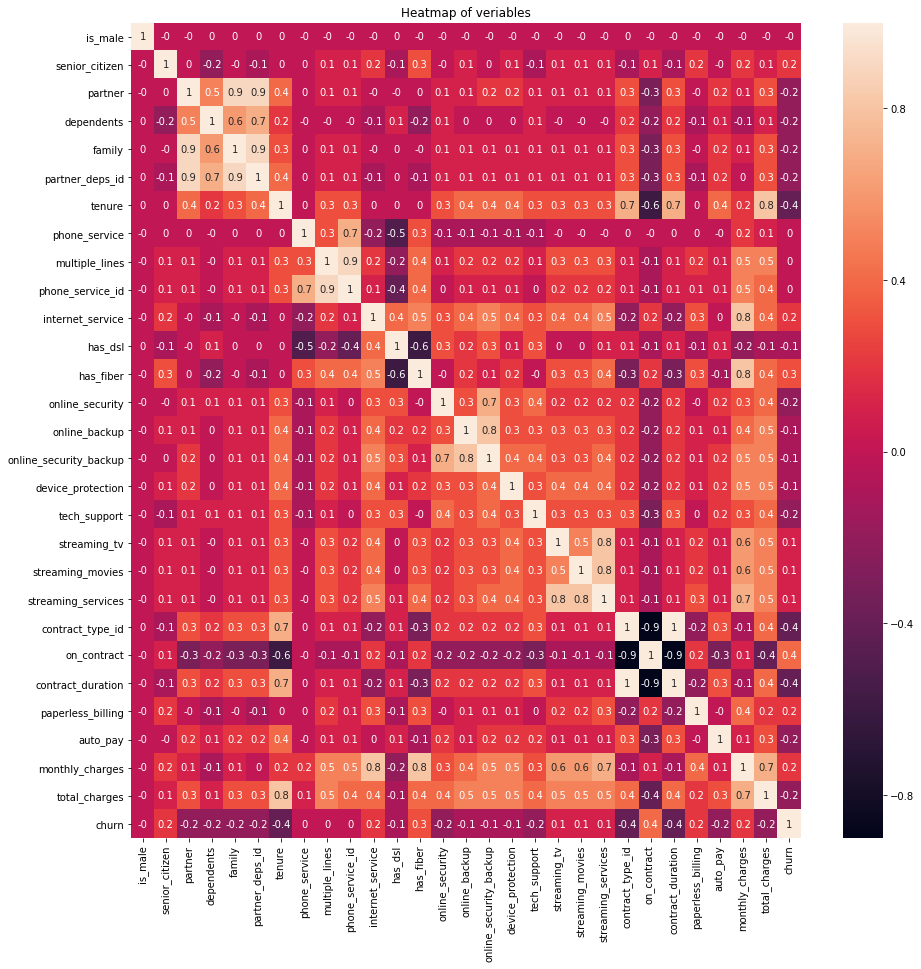

In [39]:
# Displaying heat map of features and churn
plt.figure(figsize=(15, 15))
plt.title("Heatmap of veriables")
sns.heatmap(round(df.corr(),1),annot=True)
plt.show()

**9)What can you say about each variable's relationship to churn, based on your initial exploration?**

**only 5 features have .3 correlation or higher: tenure, has_fiber, contract_type_id, on_contract, and contract_duration**

**After removing features that convay similer information to contract_duration the remaining features are tenure, has_fiber, and contract_duration**

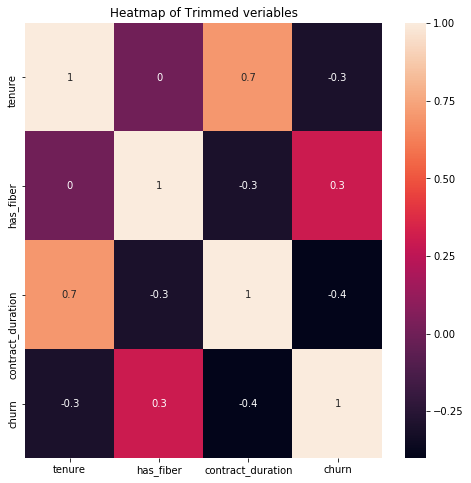

In [40]:
df_3 = train[['tenure', 'has_fiber', 'contract_duration','churn']]
plt.figure(figsize=(8, 8))
plt.title("Heatmap of Trimmed veriables")
sns.heatmap(round(df_3.corr(),1),annot=True)
plt.show()

Big Take aways:
    
Churn is not driven by contracts expireing.

Contrat length should be looked at as a way to measure existing consumer confidence not as way to increase 'trap' customers into staying longer.

The service most correlated with churn is fiber optic cable at .3

Most of our other services have a churn correlation of .1 
Further investigstion is needed to discover why there is more churn in this area.
While exploring the data I was able to determine that there is a statistically significant differince the monthl charges incurred by Fiberoptic users who churned and those who did not. Further investigation is needed to determine if this is what is driving churn

**Creating csv file**

In [66]:
#test
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=123)
clf.fit(X_train,y_train)

y_pred_test=clf.predict(X_test)

In [67]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=123)
clf.fit(X_train,y_train)

y_pred_train=clf.predict(X_train)
y_pred_train=pd.Series(y_pred_train)

In [73]:
y_pred_test = list(y_pred_test)
y_pred_train = list(y_pred_train)
all_predictions = y_pred_test + y_pred_train

In [69]:
len(y_predictions)

7043

In [74]:
cust_id = test.customer_id.append(train.customer_id)

In [75]:
len(cust_id)

7043

In [78]:
df_csv = pd.DataFrame({"customer_id": cust_id, "churn_prediction": all_predictions})
df_csv.head()

,customer_id,churn_prediction
4210,4905-JEFDW,0
2099,3503-TYDAY,0
5302,7890-VYYWG,0
2791,3763-GCZHZ,0
3471,5130-IEKQT,0


In [79]:
#df_csv.to_csv("churn_predictions.csv")